In [28]:
import cv2
import numpy as np
import os

In [30]:
# Model dosyalarını ayarla
cfg_file = "darknet19.cfg"
weights_file = "darknet19.weights"
classes_file = "imagenet.shortnames.list"

In [32]:
print("Current Working Directory:", os.getcwd())
print("config Dosyası Var mı?:", os.path.exists(cfg_file))
print("weight Dosyası Var mı?:", os.path.exists(weights_file))
print("class Var mı?:", os.path.exists(classes_file))

Current Working Directory: C:\Users\Monster\OneDrive\Masaüstü\opencv-dnn-models\darknet19
config Dosyası Var mı?: True
weight Dosyası Var mı?: True
class Var mı?: True


In [34]:
  # 1000 sınıflık text dosyası (her satır bir class)
with open(classes_file, "r") as f:
    class_names = [line.strip() for line in f.readlines()]

In [36]:
net = cv2.dnn.readNetFromDarknet(cfg_file, weights_file)

In [38]:
# Test resmi oku
image = cv2.imread("cat.jpg")   # Buraya test resminin yolunu koy
h, w = image.shape[:2]

In [40]:
input_size = (224, 224)   # çoğu classification model 224x224 input bekler
blob = cv2.dnn.blobFromImage(image, 1/255.0, input_size, swapRB=True, crop=False)

In [42]:
net.setInput(blob)

In [44]:
output = net.forward()   # [1, num_classes]

In [46]:
# En yüksek olasılıklı sınıfı bul
class_id = int(np.argmax(output[0]))
confidence = float(output[0][class_id])
label = f"{class_names[class_id]}: {confidence:.2f}"

C:\Users\Monster\AppData\Local\Temp\ipykernel_12572\2559879628.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  confidence = float(output[0][class_id])


In [48]:
print("Tahmin:", label)

Tahmin: tabby: 0.81


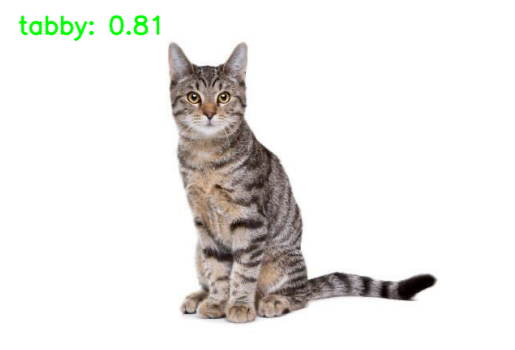

In [50]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image, label, (10, 30), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

# Çıktıyı kaydet
cv2.imwrite("output.jpg", image)

# Notebook içinde göstermek için
from matplotlib import pyplot as plt

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()